In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:


# Hiển thị index của tập dữ liệu kiểm tra
print(df.index)


RangeIndex(start=0, stop=303, step=1)


In [7]:
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

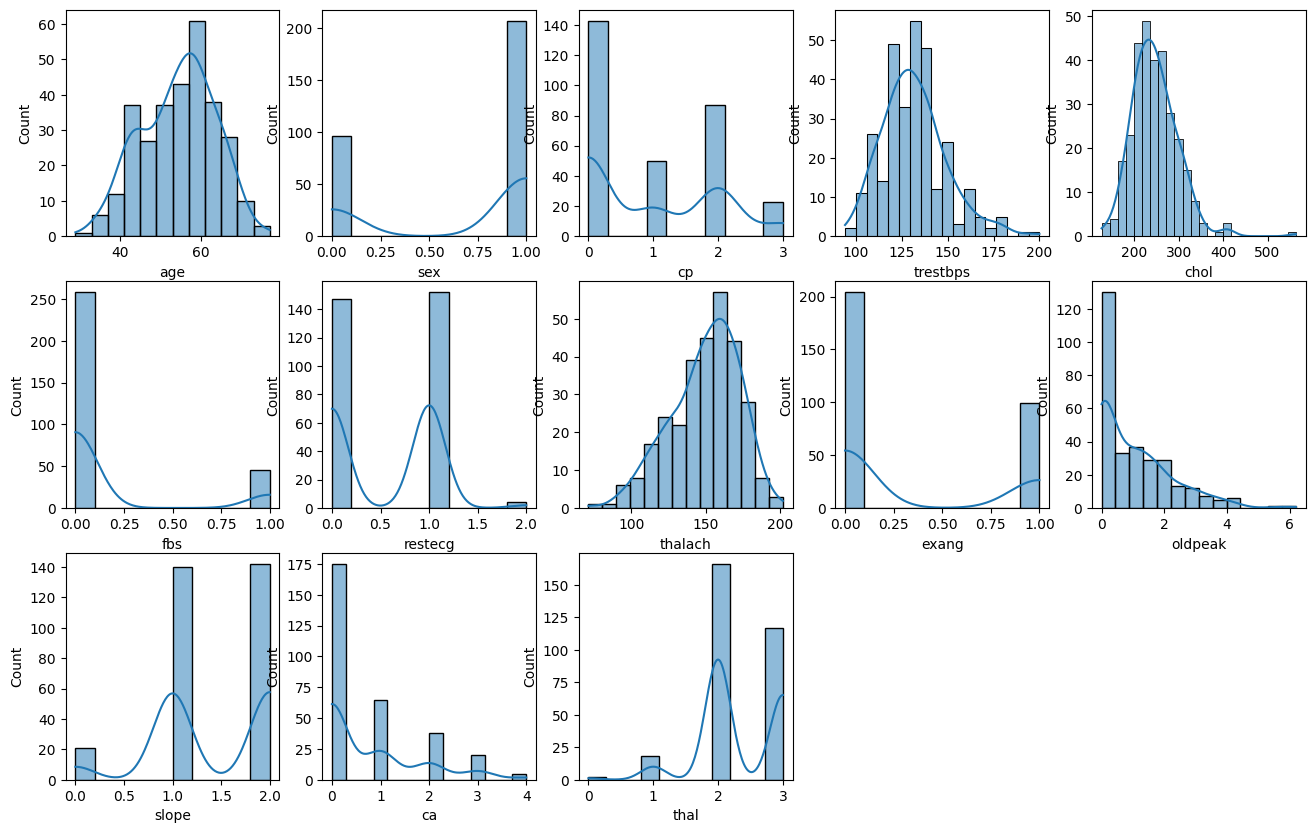

In [8]:
fig = plt.figure(figsize=(16,10))
for i in range(len(columns_eda)): 
    colname = columns_eda[i]
    sub = fig.add_subplot(3,5,i+1) 
    sns.histplot(data=df,x=colname, kde=True)

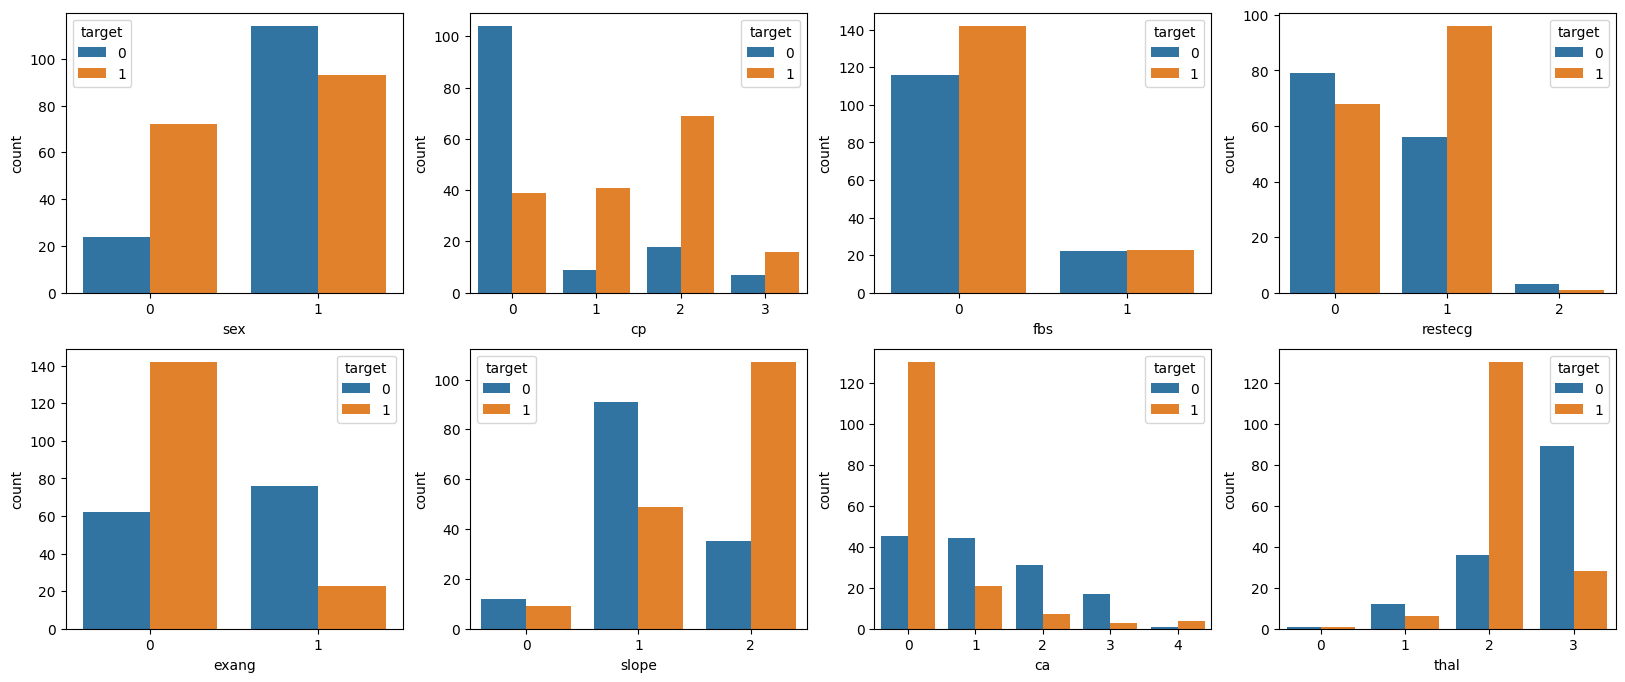

In [9]:
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 
fig = plt.figure(figsize=(20,8))


for i in range(len(categories_list)): 
    colname = categories_list[i] 
    sub = fig.add_subplot(2,4,i+1) 
    sns.countplot(data=df,x=colname, hue="target")

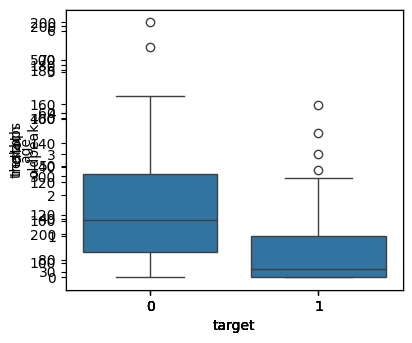

In [10]:
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig =  plt.figure(figsize=(20,8))
for i in range(len(numeric_list)):
    colname =  numeric_list[i]
    sub = fig.add_subplot(2,4,1+1)
    sns.boxplot(data=df,y=colname, x="target")

In [11]:
X = df.iloc[:, :-1].values
Y = df[['target']].values
x = X.astype(float)
y = Y.astype(float)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In ra kích thước của các tập dữ liệu
print("Kích thước tập X_train:", X_train.shape)
print("Kích thước tập X_test:", X_test.shape)

Kích thước tập X_train: (242, 13)
Kích thước tập X_test: (61, 13)


In [13]:
X_train

array([[42.,  1.,  1., ...,  2.,  0.,  2.],
       [58.,  1.,  0., ...,  2.,  0.,  3.],
       [46.,  1.,  2., ...,  1.,  0.,  2.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

In [14]:
X_test

array([[5.70e+01, 1.00e+00, 0.00e+00, 1.50e+02, 2.76e+02, 0.00e+00,
        0.00e+00, 1.12e+02, 1.00e+00, 6.00e-01, 1.00e+00, 1.00e+00,
        1.00e+00],
       [5.90e+01, 1.00e+00, 3.00e+00, 1.70e+02, 2.88e+02, 0.00e+00,
        0.00e+00, 1.59e+02, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [5.70e+01, 1.00e+00, 2.00e+00, 1.50e+02, 1.26e+02, 1.00e+00,
        1.00e+00, 1.73e+02, 0.00e+00, 2.00e-01, 2.00e+00, 1.00e+00,
        3.00e+00],
       [5.60e+01, 0.00e+00, 0.00e+00, 1.34e+02, 4.09e+02, 0.00e+00,
        0.00e+00, 1.50e+02, 1.00e+00, 1.90e+00, 1.00e+00, 2.00e+00,
        3.00e+00],
       [7.10e+01, 0.00e+00, 2.00e+00, 1.10e+02, 2.65e+02, 1.00e+00,
        0.00e+00, 1.30e+02, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00,
        2.00e+00],
       [5.70e+01, 1.00e+00, 2.00e+00, 1.50e+02, 1.68e+02, 0.00e+00,
        1.00e+00, 1.74e+02, 0.00e+00, 1.60e+00, 2.00e+00, 0.00e+00,
        2.00e+00],
       [4.60e+01, 0.00e+00, 0.00e+00, 1.38e+02, 2.43e+02, 0.00e+00,
  

In [15]:
knn = KNeighborsClassifier(n_neighbors= 8, algorithm= "ball_tree")
knn.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [16]:
knn.score(X_test, y_test)

0.6885245901639344

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

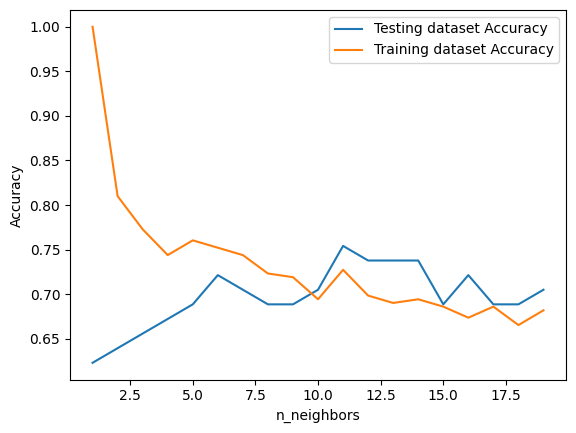

In [17]:
import numpy as np
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Tìm giá trị K tốt nhất (giá trị K có độ chính xác trên tập test cao nhất)
best_k = neighbors[np.argmax(test_accuracy)]
print(f"Giá trị K tốt nhất là: {best_k}")

Giá trị K tốt nhất là: 11


In [19]:
from sklearn.metrics import accuracy_score

# Xây dựng lại mô hình với K tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Huấn luyện lại mô hình
knn_best.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_best.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình với K={best_k} là: {accuracy:.2f}")

# Lấy ra các hàng xóm gần nhất cho mỗi mẫu trong tập kiểm tra
distances, indices = knn_best.kneighbors(X_test)

# In ra danh sách các hàng xóm gần nhất
print("Khoảng cách đến các hàng xóm gần nhất:", distances)
print("Danh sách index của các hàng xóm gần nhất trong tập huấn luyện:", indices)

# Xem từng mẫu trong tập kiểm tra và in ra hàng xóm gần nhất
for i, neighbors in enumerate(indices):
    print(f"Mẫu {i} trong tập kiểm tra có các hàng xóm với index: {neighbors}")

Độ chính xác của mô hình với K=11 là: 0.75
Khoảng cách đến các hàng xóm gần nhất: [[ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
  28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]
 [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
  31.43580761 32.57299495 34.21461676 35.98555266 36.39725264]
 [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
  61.48788499 61.61980201 61.91413409 62.66450351 62.98761783]
 [15.49870962 18.20466973 18.77471704 56.31349749 58.30686066 58.89388763
  68.9890571  70.70509175 73.89594035 75.21043811 78.1422421 ]
 [14.45821566 18.65368596 23.08332732 23.13201245 23.40939982 25.0998008
  25.74878638 26.25718949 27.05845524 28.40492915 28.7923601 ]
 [18.4        21.65733132 23.94911272 23.94911272 27.62173058 29.97599039
  30.36511156 32.17530109 36.38076415 36.66824239 36.70912693]
 [ 7.07389567 12.38709005 14.         14.83239697 14.96529318 15.82276841
  16.53027525 18.247191

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
# Lấy ra các hàng xóm gần nhất cho mỗi mẫu trong tập test
distances, indices = knn_best.kneighbors(X_test)

# In ra khoảng cách và chỉ số của các hàng xóm gần nhất
print("Khoảng cách đến các hàng xóm gần nhất và chỉ số của chúng:")

# Duyệt qua từng mẫu trong tập test và in thông tin chi tiết
for i in range(len(X_test)):
    print(f"\nMẫu {i} trong tập test:")
    print(f"Khoảng cách đến các hàng xóm gần nhất: {distances[i]}")
    print(f"Index của các hàng xóm gần nhất trong tập train: {indices[i]}")


Khoảng cách đến các hàng xóm gần nhất và chỉ số của chúng:

Mẫu 0 trong tập test:
Khoảng cách đến các hàng xóm gần nhất: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]
Index của các hàng xóm gần nhất trong tập train: [  1  79 161 222 211  25 217 166 103 111  88]

Mẫu 1 trong tập test:
Khoảng cách đến các hàng xóm gần nhất: [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
 31.43580761 32.57299495 34.21461676 35.98555266 36.39725264]
Index của các hàng xóm gần nhất trong tập train: [179 101  89  70 167  92   7 149 114 221 172]

Mẫu 2 trong tập test:
Khoảng cách đến các hàng xóm gần nhất: [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
 61.48788499 61.61980201 61.91413409 62.66450351 62.98761783]
Index của các hàng xóm gần nhất trong tập train: [195 148 147  34  19 106 176 216 158  98 100]

Mẫu 3 trong tập test:
Khoảng cách đến các hàng xóm gần nhất: [15

In [21]:
# Lấy ra khoảng cách và chỉ số hàng xóm gần nhất cho toàn bộ tập test
distances, indices = knn_best.kneighbors(X_test)

# In ra thông tin cho sample input đầu tiên trong tập test (index 0)
sample_index = 0
print(f"Thông tin về sample input đầu tiên (index {sample_index}) trong tập test:")

# Khoảng cách đến các hàng xóm gần nhất
print(f"Khoảng cách đến các hàng xóm gần nhất: {distances[sample_index]}")

# Index của các hàng xóm gần nhất trong tập huấn luyện
print(f"Index của các hàng xóm gần nhất trong tập train: {indices[sample_index]}")


Thông tin về sample input đầu tiên (index 0) trong tập test:
Khoảng cách đến các hàng xóm gần nhất: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]
Index của các hàng xóm gần nhất trong tập train: [  1  79 161 222 211  25 217 166 103 111  88]


In [22]:
import numpy as np

# Mẫu input tương ứng
sample_input = np.array([[47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]])

# Lấy ra các hàng xóm gần nhất và khoảng cách tương ứng từ tập huấn luyện
distances, indices = knn_best.kneighbors(sample_input)

# In ra danh sách các hàng xóm gần nhất và khoảng cách tương ứng
print("Khoảng cách đến các hàng xóm gần nhất:", distances[0])
print("Index của các hàng xóm gần nhất trong tập train:", indices[0])

# In ra giá trị 'age' của hàng xóm gần nhất (dựa trên index của hàng xóm đầu tiên)
# Giả sử cột 'age' là cột đầu tiên trong X_train (nếu không, thay thế số 0 bằng chỉ số cột chính xác)
for neighbor_index in indices[0]:
    age_of_neighbor = X_train[neighbor_index, 0]  # Lấy giá trị 'age' từ tập huấn luyện (cột 0)
    print(f"Giá trị Age của hàng xóm có index {neighbor_index} là: {age_of_neighbor}")



Khoảng cách đến các hàng xóm gần nhất: [16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
 23.09567059 23.23790008 23.89748941 24.4705946  24.58149711]
Index của các hàng xóm gần nhất trong tập train: [168   2 180  11  94  62 172 213  67  66 189]
Giá trị Age của hàng xóm có index 168 là: 61.0
Giá trị Age của hàng xóm có index 2 là: 46.0
Giá trị Age của hàng xóm có index 180 là: 47.0
Giá trị Age của hàng xóm có index 11 là: 62.0
Giá trị Age của hàng xóm có index 94 là: 45.0
Giá trị Age của hàng xóm có index 62 là: 56.0
Giá trị Age của hàng xóm có index 172 là: 60.0
Giá trị Age của hàng xóm có index 213 là: 51.0
Giá trị Age của hàng xóm có index 67 là: 57.0
Giá trị Age của hàng xóm có index 66 là: 60.0
Giá trị Age của hàng xóm có index 189 là: 70.0


In [23]:
import pandas as pd
import numpy as np

# Chuyển y thành mảng 1 chiều bằng cách làm phẳng nó
y_flattened = y.ravel()  # Hoặc có thể dùng y.flatten()

# Chuyển y (NumPy array) đã làm phẳng thành Pandas Series
y_series = pd.Series(y_flattened)

# Xem phân phối của biến target
print("Phân phối của các nhãn (target) trong dữ liệu:")
print(y_series.value_counts())

# Nếu muốn in các nhãn cụ thể
unique_labels = y_series.unique()
print("\nDanh sách các nhãn của biến target:")
print(unique_labels)




Phân phối của các nhãn (target) trong dữ liệu:
1.0    165
0.0    138
Name: count, dtype: int64

Danh sách các nhãn của biến target:
[1. 0.]


In [24]:
# Dự báo xác suất trên tập test
proba_predictions = knn_best.predict_proba(X_test)

# In ra danh sách xác suất dự báo cho mỗi mẫu trong tập test
print("Xác suất tiền dự báo của các mẫu trong tập test theo các nhãn đầu ra:")

for i, probs in enumerate(proba_predictions):
    print(f"Mẫu {i}: Xác suất nhãn 0 = {probs[0]:.2f}, Xác suất nhãn 1 = {probs[1]:.2f}")


Xác suất tiền dự báo của các mẫu trong tập test theo các nhãn đầu ra:
Mẫu 0: Xác suất nhãn 0 = 1.00, Xác suất nhãn 1 = 0.00
Mẫu 1: Xác suất nhãn 0 = 0.45, Xác suất nhãn 1 = 0.55
Mẫu 2: Xác suất nhãn 0 = 0.45, Xác suất nhãn 1 = 0.55
Mẫu 3: Xác suất nhãn 0 = 0.45, Xác suất nhãn 1 = 0.55
Mẫu 4: Xác suất nhãn 0 = 0.64, Xác suất nhãn 1 = 0.36
Mẫu 5: Xác suất nhãn 0 = 0.18, Xác suất nhãn 1 = 0.82
Mẫu 6: Xác suất nhãn 0 = 0.36, Xác suất nhãn 1 = 0.64
Mẫu 7: Xác suất nhãn 0 = 0.64, Xác suất nhãn 1 = 0.36
Mẫu 8: Xác suất nhãn 0 = 0.73, Xác suất nhãn 1 = 0.27
Mẫu 9: Xác suất nhãn 0 = 0.27, Xác suất nhãn 1 = 0.73
Mẫu 10: Xác suất nhãn 0 = 0.64, Xác suất nhãn 1 = 0.36
Mẫu 11: Xác suất nhãn 0 = 0.45, Xác suất nhãn 1 = 0.55
Mẫu 12: Xác suất nhãn 0 = 0.18, Xác suất nhãn 1 = 0.82
Mẫu 13: Xác suất nhãn 0 = 0.55, Xác suất nhãn 1 = 0.45
Mẫu 14: Xác suất nhãn 0 = 0.18, Xác suất nhãn 1 = 0.82
Mẫu 15: Xác suất nhãn 0 = 0.18, Xác suất nhãn 1 = 0.82
Mẫu 16: Xác suất nhãn 0 = 0.18, Xác suất nhãn 1 = 0.82
Mẫu 1

In [25]:
# Dự báo xác suất trên tập test
proba_predictions = knn_best.predict_proba(X_test)

# Lấy xác suất của mẫu input thứ hai trong tập test (index 1)
sample_index = 1
sample_proba = proba_predictions[sample_index]

# Xác định nhãn có xác suất cao hơn
if sample_proba[0] > sample_proba[1]:
    print(f"Mẫu thứ hai có xác suất cao hơn cho nhãn 0 với giá trị: {sample_proba[0]:.2f}")
    print(f"Xác suất cho nhãn 1 là: {sample_proba[1]:.2f}")
else:
    print(f"Mẫu thứ hai có xác suất cao hơn cho nhãn 1 với giá trị: {sample_proba[1]:.2f}")
    print(f"Xác suất cho nhãn 0 là: {sample_proba[0]:.2f}")


Mẫu thứ hai có xác suất cao hơn cho nhãn 1 với giá trị: 0.55
Xác suất cho nhãn 0 là: 0.45


In [26]:
y_test_prdicted = knn.predict(X_test)
y_test_prdicted

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0.])

In [27]:
# Dự báo xác suất trên tập test
proba_predictions = knn_best.predict_proba(X_test)

# Ngưỡng xác suất
threshold = 0.65

# Danh sách các mẫu input cần kiểm tra
samples_to_check = [1, 4, 5]  # Mẫu số 2 (index 1), mẫu số 5 (index 4), mẫu số 6 (index 5)

for sample_index in samples_to_check:
    sample_proba = proba_predictions[sample_index]
    
    # Kiểm tra ngưỡng xác suất cho mẫu hiện tại
    if sample_proba[1] >= threshold:
        prediction = 1
    elif sample_proba[0] >= threshold:
        prediction = 0
    else:
        # Nếu không đạt ngưỡng cho cả hai, dự đoán nhãn có xác suất cao hơn
        prediction = np.argmax(sample_proba)
    
    print(f"Kết quả dự báo của mẫu input số {sample_index + 1} là: {prediction}")
    print(f"Xác suất nhãn 0: {sample_proba[0]:.2f}, Xác suất nhãn 1: {sample_proba[1]:.2f}")


Kết quả dự báo của mẫu input số 2 là: 1
Xác suất nhãn 0: 0.45, Xác suất nhãn 1: 0.55
Kết quả dự báo của mẫu input số 5 là: 0
Xác suất nhãn 0: 0.64, Xác suất nhãn 1: 0.36
Kết quả dự báo của mẫu input số 6 là: 1
Xác suất nhãn 0: 0.18, Xác suất nhãn 1: 0.82


In [28]:
from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(y_test, y_test_prdicted)
cfmx

array([[19, 10],
       [ 8, 24]])

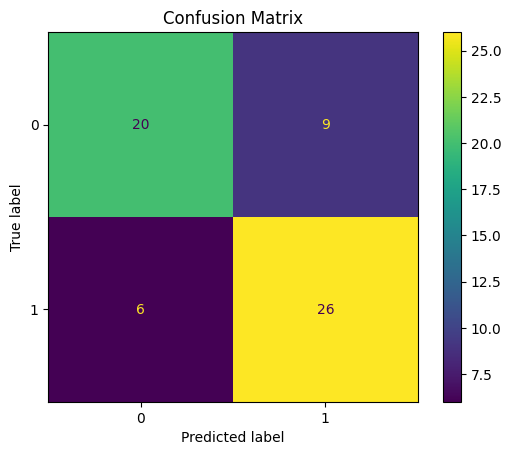

Confusion Matrix:
[[20  9]
 [ 6 26]]


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dự đoán nhãn trên tập test với ngưỡng xác suất
y_pred = knn_best.predict(X_test)

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

# In ra giá trị của confusion matrix
print("Confusion Matrix:")
print(cm)


In [30]:
from sklearn.metrics import classification_report

# In ra báo cáo đánh giá bao gồm Precision, Recall, và F1 Score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Dự đoán nhãn trên tập test
y_pred = knn_best.predict(X_test)

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# In ra confusion matrix
print("Confusion Matrix:")
print(cm)

# Tính toán các chỉ số
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Tính toán Precision, Recall và F1 Score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# In ra các chỉ số
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# In ra báo cáo đánh giá
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[20  9]
 [ 6 26]]
Precision: 0.74
Recall: 0.81
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_prdicted))

              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68        29
         1.0       0.71      0.75      0.73        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



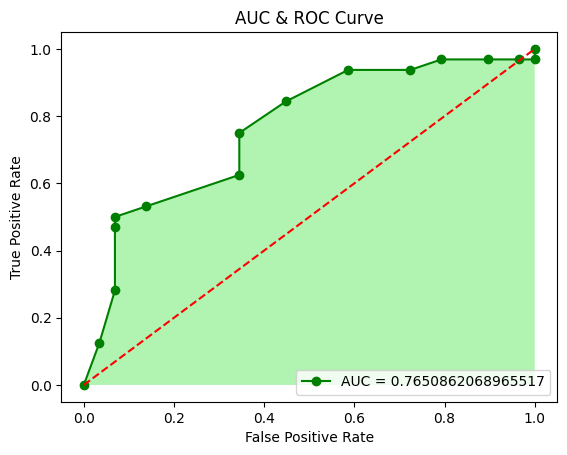

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_red_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_red_proba)
auc = metrics.roc_auc_score(y_test, y_red_proba)
plt.plot(fpr, tpr, 'go-', label = 'AUC = '+str(auc))
plt.plot([0,1], [0,1], 'r--')
plt.title('AUC & ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr,tpr, facecolor='lightgreen', alpha=0.7)
plt.show()


Confusion Matrix:
[[25  4]
 [16 16]]

Accuracy: 0.67
TP: 16, TN: 25, FP: 4, FN: 16
TPR: 0.50, FNR: 0.50, FPR: 0.14, TNR: 0.86
Precision: 0.80, Recall: 0.50, F1 Score: 0.62


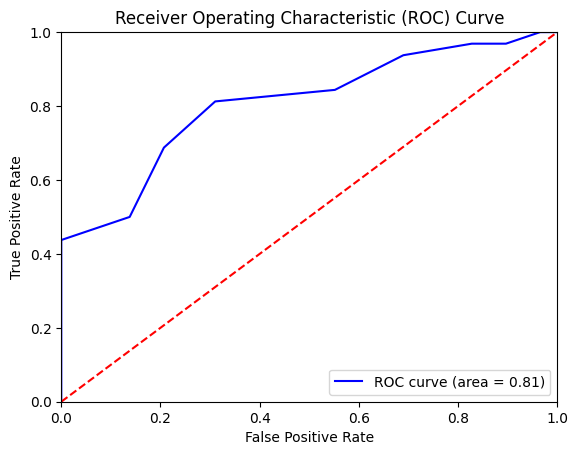


Kết luận:
Khi ngưỡng xác suất tăng lên (ví dụ: từ 0.65 lên 0.75):
- Precision có thể tăng, nhưng Recall có thể giảm.
- Số lượng False Negatives có thể tăng, dẫn đến nhiều bệnh nhân có bệnh bị bỏ sót.

Khi ngưỡng xác suất giảm xuống (ví dụ: từ 0.65 xuống 0.55):
- Recall có thể tăng, nhưng Precision có thể giảm.
- Số lượng False Positives có thể tăng, dẫn đến việc điều trị không cần thiết cho những bệnh nhân không có bệnh.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, accuracy_score, precision_score,
                             recall_score, f1_score)

# Dự đoán nhãn trên tập test với ngưỡng xác suất
y_pred_proba = knn_best.predict_proba(X_test)[:, 1]  # Xác suất cho nhãn 1
threshold = 0.65
y_pred = (y_pred_proba >= threshold).astype(int)  # Dự đoán dựa trên ngưỡng

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# In ra confusion matrix
print("Confusion Matrix:")
print(cm)

# Tính toán các chỉ số
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Tính toán Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Tính toán các chỉ số TPR, FNR, FPR, TNR
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate (Recall)
FNR = FN / (TP + FN) if (TP + FN) > 0 else 0  # False Negative Rate
FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate

# Tính toán Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In ra các chỉ số
print(f"\nAccuracy: {accuracy:.2f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"TPR: {TPR:.2f}, FNR: {FNR:.2f}, FPR: {FPR:.2f}, TNR: {TNR:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Đồ thị AUC và ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Kết luận
print("\nKết luận:")
print("Khi ngưỡng xác suất tăng lên (ví dụ: từ 0.65 lên 0.75):")
print("- Precision có thể tăng, nhưng Recall có thể giảm.")
print("- Số lượng False Negatives có thể tăng, dẫn đến nhiều bệnh nhân có bệnh bị bỏ sót.")
print("\nKhi ngưỡng xác suất giảm xuống (ví dụ: từ 0.65 xuống 0.55):")
print("- Recall có thể tăng, nhưng Precision có thể giảm.")
print("- Số lượng False Positives có thể tăng, dẫn đến việc điều trị không cần thiết cho những bệnh nhân không có bệnh.")


In [35]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Giả sử bạn đã huấn luyện mô hình K-NN và lưu lại nó
# knn_best = KNeighborsClassifier(n_neighbors=k)
# knn_best.fit(X_train, y_train)

# Hàm để dự đoán bệnh tim
def predict_heart_disease(model, features, threshold=0.5):
    # Dự đoán xác suất cho nhãn 1
    proba = model.predict_proba([features])[:, 1]
    prediction = (proba >= threshold).astype(int)
    return prediction[0], proba[0]

def main():
    print("Chương trình dự báo bệnh tim")
    
    # Nhập các đặc trưng đầu vào
    age = float(input("Nhập tuổi: "))
    sex = int(input("Nhập giới tính (0 = nữ, 1 = nam): "))
    cp = int(input("Nhập loại đau ngực (0-3): "))
    trestbps = float(input("Nhập huyết áp: "))
    chol = float(input("Nhập cholesterol: "))
    fbs = int(input("Nhập chỉ số đường huyết (0 = không, 1 = có): "))
    restecg = int(input("Nhập kết quả điện tâm đồ (0-2): "))
    thalach = float(input("Nhập nhịp tim tối đa: "))
    exang = int(input("Nhập tập thể dục gây đau ngực (0 = không, 1 = có): "))
    oldpeak = float(input("Nhập độ dốc ST (nếu có): "))
    slope = int(input("Nhập độ dốc ST (0-2): "))
    ca = int(input("Nhập số mạch vành (0-3): "))
    thal = int(input("Nhập thalassemia (0-3): "))

    # Danh sách các đặc trưng
    features = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

    # Nhập ngưỡng xác suất
    threshold_input = input("Nhập ngưỡng xác suất (mặc định 0.5): ")
    threshold = float(threshold_input) if threshold_input else 0.5

    # Dự đoán bệnh tim

    
    prediction, proba = predict_heart_disease(knn_best, features, threshold)

    # In kết quả
    if prediction == 1:
        print(f"\nKết quả dự đoán: Bệnh nhân có khả năng bị bệnh tim.")
    else:
        print(f"\nKết quả dự đoán: Bệnh nhân không có bệnh tim.")
    
    print(f"Xác suất dự đoán là: {proba:.2f}")

if __name__ == "__main__":
    main()


Chương trình dự báo bệnh tim

Kết quả dự đoán: Bệnh nhân có khả năng bị bệnh tim.
Xác suất dự đoán là: 0.45


Bài tập về nhà 

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns